In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<p>
<img src="./pics/header_new.svg" style="float: center"/>
</p>

***

# A3 - Python through a DS example: part 1
<img src="./pics/gorenje_logo.svg" width="500" height="100" align="right"/>

> Tomaž Bregar $\,\,$ *tomaz.bregar@gorenje.com* <br>





***

> ### <i class="fa fa-graduation-cap" aria-hidden="true"></i> Lesson highlights  
> - #### Derivation of mass and stiffness matrices for a simple discrete system.
> - #### Solving eigenvalue problem.
> - #### Synthetization of frequency response functions (FRFs).

***

## A3.1 Introduction

The dynamic properties of the system are described by the equilibrium equation, where the external forces are equal to the internal forces resulting from inertia, damping, and elasticity. 
The basic equation in a time domain for a linear dynamic system takes the following form (damping is neglected):

$$
\mathbf{M} \, \boldsymbol{\ddot{x}}(t) + \mathbf{K} \, \boldsymbol{x}(t) = \boldsymbol{f}(t),
$$

where $\mathbf{M}$ represents the mass matrix, $\mathbf{K}$ the stiffness matrix, $\boldsymbol{x}$ vector of responses at all $n$ degrees of freedom (DoFs), and $\boldsymbol{f}$ vector of externally applied forces.

For consistent modeling of dynamic systems within the frequency domain the following assumptions have to be valid:

* __Linearity__ - response amplitude is linearly proportional to the excitation amplitude.

* __Time invariance__ - mass, stiffness, and damping characteristics are time-independent.

* __Passivity__ - the energy flow in the system is always positive or equal to zero.

* __Reciprocity__ - the response of the structure remains the same if the excitation and response location are switched.

* __Stability__ - the response of the system is bounded if the excitation of the system is bounded.

If we apply the Fourier transform, a time function of response $\boldsymbol{x}(t)$ can be written in  the frequency domain ($\boldsymbol{x}(\omega)$) and basic equation takes the following form: 

$$
\mathbf{M} \, \boldsymbol{\ddot{x}}(\omega) + \mathbf{K} \, \boldsymbol{x}(\omega) = \boldsymbol{f}(\omega).
$$

By following the fact that $\boldsymbol{\ddot{x}}(\omega) = - \omega^2 \boldsymbol{x}(\omega) $ we can express $\boldsymbol{x}(\omega)$ on the right-hand side: 

$$
(- \omega^2\,\mathbf{M} + \mathbf{K}) \boldsymbol{x}(\omega) = \boldsymbol{f}(\omega).
$$

The left-hand side can be collected into a single frequency-dependent matrix $\mathbf{Z}(\omega)$:

$$
\mathbf{Z}(\omega) \boldsymbol{x}(\omega) = \boldsymbol{f}(\omega).
$$

The impedance matrix $\mathbf{Z}(\omega)$ is also called the dynamic stiffness matrix (often referred to as mechanical impedance or apparent mass). By inverting the mechanical impedance an admittance notation $\mathbf{Y}(\omega)$ can be obtained:

$$
\boldsymbol{u}(\omega) = \mathbf{Y}(\omega) \boldsymbol{f}(\omega). \qquad \mathbf{Y}(\omega) = \left(\mathbf{Z}(\omega)\right)^{-1}.
$$

The $\mathbf{Y}(\omega)$ denotes the frequency response function matrix and is often referred
to as admittance or dynamic flexibility. 

The admittance matrix is sometimes also denoted with the letter $\mathbf{H}$. 

### Admittance matrix $\mathbf{Y}$

An admittance $\mathbf{Y}_{ij}$ is defined as the response at $i$-th DoF when a unit excitation force is applied at $j$-th DoF. A whole $j$-th column from the admittance matrix $\mathbf{Y}$ can be determined from a single excitation point; therefore, the admittance matrix is fully coupled. A single admittance FRF is a _global_ observation of the system dynamics.

<c>
<center><img src="./pics/YY_matrix.svg"/ width = 400></center>
</c>

### Impedance matrix $\mathbf{Z}$

The impedance $\mathbf{Z}_{ji}$ is defined as the force at $j$-th DoF when a unitary displacement is imposed at $i$-th DoF, while all remaining DoFs are fixed. Therefore, the impedance matrix $\mathbf{Z}$ is commonly sparse in the sense that a single impedance term is a _local_ observation of the system dynamics.

<c>
<center><img src="./pics/ZZ_matrix.svg?123" width = 350></center>
</c>

## A3.2 Eigenvalue problem

The eigenfrequencies and eigenvectors  can be determined from the equilibrium equation, when considering a system response with free vibrations:

$$
\mathbf{M}\,\boldsymbol{\ddot{x}}(t)+\mathbf{K}\,\boldsymbol{x}(t)=\boldsymbol{0}.
$$

Euler's identity represents the solution of the differential equation: $\boldsymbol{x}(t)=\boldsymbol{X}\,e^{\text{i}\,\omega\,t}$ and
$\boldsymbol{\ddot{x}}(t)=-\omega^2\boldsymbol{X}\,e^{\text{i}\,\omega\,t}$.
By transformation to modal domain the equation of motion takes the following form: $\mathbf{M}(-\omega^2\boldsymbol{X}\,e^{\text{i}\,\omega\,t})+\mathbf{K}\,(\boldsymbol{X}\,e^{\text{i}\,\omega\,t})=\boldsymbol{0}$.
By knowing $e^{\text{i}\,\omega\,t}\neq 0$ for any time $t$ we obtain: 

$$
(\mathbf{K} - \omega^2\,\mathbf{M}) \boldsymbol{X} = \boldsymbol{0}.
$$

To get a non-trivial solution it is necessary to satisfy $\text{det}(\mathbf{K}-\omega_r^2\,\mathbf{M})=\boldsymbol{0}$.
By solving the determinant, the eigenvalues ($\omega_1^2, \omega_2^2, \dots$) are determined, which represent undamped natural frequencies. 
Each eigenvalue results in corresponding eigenvector ($\boldsymbol{\psi}_1, \boldsymbol{\psi}_2, \dots$) which represents mode shape.
Eigenvalues and eigenvectors can be organized into matrix form:

$$
[^{\nwarrow}{\pmb{\omega}_{r}^2}_{\searrow}]=
\begin{bmatrix} 
   \omega_1^2 & 0 & \cdots & 0 \\
   0 & \omega_2^2 & \cdots & 0 \\
   \vdots & \vdots & \ddots & \vdots \\
   0 & 0 & \cdots & \omega_N^2
\end{bmatrix}, 
   \qquad
   [\pmb{\Psi}] = \begin{bmatrix} \boldsymbol{\psi}_1 & \boldsymbol{\psi}_2 & \cdots & \boldsymbol{\psi}_N\end{bmatrix}
.$$

Modal mass and modal stiffness are calculated using the following equations:

$$
\pmb{\Psi}^{\text{T}}\,\mathbf{M}\,\pmb{\Psi} = [^{\nwarrow}{m_{r}}_{\searrow}], 
\qquad
\pmb{\Psi}^{\text{T}}\,\mathbf{K}\,\pmb{\Psi} = [^{\nwarrow}{k_{r}}_{\searrow}]
.$$

Mass normalised modes are calculated using equations: $\boldsymbol{\phi}_r=\boldsymbol{\psi}_r\,\frac{1}{\sqrt{m_{r}}}$
and have the following properties:

$$
\pmb{\Phi}^{\text{T}}\,\mathbf{M}\,\pmb{\Phi} = [\mathbf{I}], 
   \qquad
   \pmb{\Phi}^{\text{T}}\,\mathbf{K}\,\pmb{\Phi} = [^{\nwarrow}{\pmb{\omega}_{r}^2}_{\searrow}].
$$

## A3.3 Simple discrete mass-spring system 

Let's first import some packages, which we will use for the calculations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Consider a simple discrete dynamic system with 4 degrees of freedom:

<p>
<img src="./pics/A_.svg"/ width = 400>
</p>

Now let's define the mass matrix:

$
\textbf{M} = \begin{bmatrix}
m_1 & 0 & 0 & 0 \\ 
0 & m_2 & 0 & 0 \\ 
0 & 0 & m_3 & 0 \\ 
0 & 0 & 0 & m_4 \\ 
\end{bmatrix}
.$


In [3]:
m1 = 1
m2 = 1
m3 = 1
m4 = 1

m = np.array([m1,m2,m3,m4])

And ckeck out how it looks in <code>Python</code>:

In [5]:
M = np.asarray([[m1,0,0,0],
                [0,m2,0,0],
                [0,0,m3,0],
                [0,0,0,m4]])


display(M)

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

We can do that waaay faster:

In [6]:
M = np.diag(m).astype(np.float64)
display(M)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Now let's define the stiffness matrix:

$
\textbf{K} = \begin{bmatrix}
k_1 & -k_1 & 0 & 0 \\ 
-k_1 & k_1+k_2 & -k_2 & 0 \\ 
0 & -k_2 & k_2+k_3  & - k_3 \\ 
0 & 0 & -k_3 & k_3 \\ 
\end{bmatrix}
.$


In [7]:
k1 = 200
k2 = 200
k3 = 200

k = np.array([k1,k2,k3])

In [8]:
K = np.asarray([[k1,-k1,0,0],
                [-k1,k1+k2,-k2,0],
                [0,-k2,k2+k3,-k3],
                [0,0,-k3,k3]])

display(K)

array([[ 200, -200,    0,    0],
       [-200,  400, -200,    0],
       [   0, -200,  400, -200],
       [   0,    0, -200,  200]])

We can also define a function, that can generate the stiffness matrix of a dynamic system with an arbitrary number of degrees of freedom. 

In [9]:
# Could be to tough - 
def mdof_K_C(p):
    N = len(p) +  1
    mat = np.zeros((N, N))
    for i in range(N):
        if i == 0:
            mat[i, :2] = np.array([ p[0] , -p[0] ]) 
        elif i == N-1:
            mat[i, -2:] = np.array([ -p[-1], + p[-1] ])
        
        
    return mat.astype(np.float64)

#K = mdof_K_C(k)

<div class="alert alert-block alert-info">
    <i class="fa fa-info-circle" aria-hidden="true"></i>
    <b>FBS TopTip:</b> Working with analytical examples can be highly beneficial when deriving new methods.
</div>

## A3.4 Solving eigenvalue problem

As the mass and stiffness matrices of the system are now defined, we can solve the eigenvalue problem. Some additional packages are required for that:

In [10]:
import scipy as sp
from scipy.sparse import linalg,diags

In [11]:
eig_val, eig_vec = sp.linalg.eigh(K, M)

eig_val.sort()
eig_freq = np.sqrt(np.abs(np.real(eig_val)))  

<div class="alert alert-block alert-danger">
    <i class="fa fa-exclamation" aria-hidden="true"></i>
    <b>Alert!</b> Take care with a number of eigenvalues. If you have a large number of DoFs the calculation may take quite a long time.
</div>

## A3.5 FRF generation

We will display the generation of frequency response functions in two different ways. First is the direct harmonic or the full-space method and second is the mode-superposition. Each of them has its own set of advantages and disadvantages.

### Direct harmonic

FRFs for the small systems can be efficiently computed using the direct harmonic method:


$$\left(-\mathbf{M} \, \omega^2+ \mathbf{K}\right) \, \boldsymbol{X}\,e^{\text{i}\,\omega\,t} = \boldsymbol{F}\,e^{\text{i}\,\omega\,t},$$
$$\left(-\mathbf{M} \, \omega^2+ \mathbf{K}\right) \, \boldsymbol{X} = \boldsymbol{F}.$$

So, the FRF matrix can be calculated as follows:

$$\boldsymbol{Y}(\omega) =\frac{\boldsymbol{X}(\omega)}{\boldsymbol{F}(\omega)} = (\mathbf{K}-\omega^2\,\mathbf{M})^{-1}.$$

Before generating the FRFs we first have to define the frequency vector:

In [12]:
f_start = 0.01
f_end = 5
f_resolution = .01
freq = np.arange(f_start, f_end, f_resolution)

ome = 2 * np.pi * freq


Using this formulation, FRFs are generated at all DoFs included in the mass and stiffness matrices. This can cause problems in the case of bigger models with a higher number of DoFs. Hence, computations can be very time and memory-consuming.


In [13]:
FRF_1 = np.zeros((4,4,len(freq)))

for i,ome_i in enumerate(ome):
    FRF_1[:,:,i] = np.linalg.inv(K-ome_i**2*M)

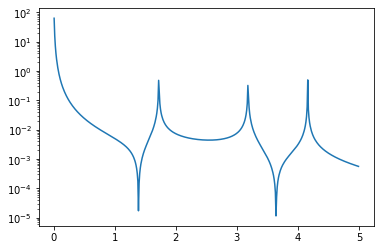

In [14]:
plt.semilogy(freq,np.abs(FRF_1[0,1,:]));

### Mode superposition

For FRF generation we can also use the modal superposition method, where contributions of modes are superposed at each frequency line using the equation: 

$$
\alpha_{i, j} = \sum_{r=1}^{m}\frac{\boldsymbol{\phi}_{i,r}\,\boldsymbol{\phi}_{j,r}}{\omega_r^2-\omega^2}.
$$

In [15]:
no_modes = len(eig_val)
FRF_2 = np.zeros((no_modes, no_modes, len(freq)), dtype=complex)

ome = 2 * np.pi * freq

# loop for each input
for i in range(no_modes):
    
    # loop for each output
    for j in range(no_modes):
        
        # loop for each modeshape
        for no in range(eig_vec.shape[1]):
            FRF_2[i, j] += eig_vec[i, no] * eig_vec[j, no] / (-ome ** 2 + eig_freq[no] ** 2)
            

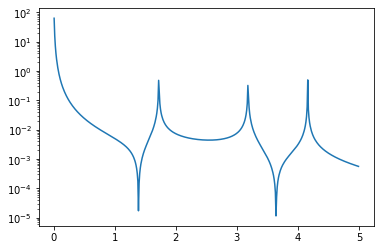

In [16]:
plt.semilogy(freq,np.abs(FRF_2[0,1,:]));

Now we can compare the two FRF synthetizations methods:

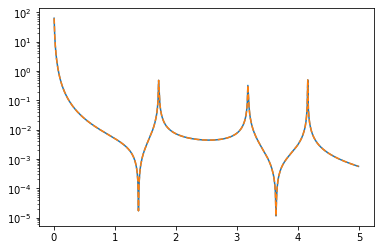

In [17]:
plt.semilogy(freq,np.abs(FRF_1[0,1,:]))
plt.semilogy(freq,np.abs(FRF_2[0,1,:]),'--');

<div class="alert alert-block alert-warning">
    <i class="fa fa-exclamation-triangle" aria-hidden="true"></i>
    <b>Warning!</b> Even if you are interested in a small frequency region only, you should always include eigenvalues from outside this region to account for upper- and lower-residuals.
</div>

<div class="alert alert-block alert-success">
    <i class="fa fa-thumbs-up" aria-hidden="true"></i>
    <b>Success!</b> Now we have FRFs for the simple discrete mass system.
</div>

> <i class="fa fa-quote-right"></i> <b>That's a wrap! Want to know more?</b> 
> <ul>
    <li> e Silva, Júlio M. Montalvão, and Nuno MM Maia, eds. Modal analysis and testing. Vol. 363. Springer Science & Business Media, 2012.</li>
    <li> Tiso, P., Allen, M. S., Rixen, D., Abrahamsson, T., Van der Seijs, M., Mayes, R. L. (2020) Substructuring in Engineering Dynamics - Emerging Numerical and Experimental Techniques. Springer </a>.
    <li>van der Seijs, M. V. (2016) Experimental dynamic substructuring: Analysis and design strategies for vehicle development. Delft University of Technology, <a href="https://repository.tudelft.nl/islandora/object/uuid:28b31294-8d53-49eb-b108-284b63edf670?collection=research">10.4233/uuid:28b31294-8d53-49eb-b108-284b63edf670</a>.</li>
</li>
</ul>